<a href="https://colab.research.google.com/github/shainaboover/DS-Unit-1-Sprint-2-Statistics/blob/master/SHAINA_BOOVER_DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np

In [76]:
# load data
credit = pd.read_csv('crx.data', header=None, na_values='?')
credit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [77]:
# make sure size is correct
credit.shape

(690, 16)

In [78]:
# check nan values
credit.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [79]:
# check if dtypes are correct
credit.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
15     object
dtype: object

In [80]:
# change int to floats
credit[14] = credit[14].astype(float)
credit[14].dtype

dtype('float64')

In [81]:
# change int to floats
credit[10] = credit[10].astype(float)
credit[10].dtype

dtype('float64')

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from scipy.stats import ttest_ind, ttest_1samp
from scipy.stats import chisquare
import scipy.stats as stats

In [92]:
# recode A16 to binary
credit[15] = credit[15].map ({'+':1,
                             '-':0})
credit[15].sample(15)

484    0
229    1
501    1
544    0
195    1
203    1
628    0
297    0
85     0
536    0
94     0
334    0
625    0
589    1
414    0
Name: 15, dtype: int64

In [95]:
# look for continuous variables
credit.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
366,a,22.75,6.165,u,g,aa,v,0.165,f,f,0.0,f,g,220.0,1000.0,0
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0.0,f,g,NaN,0.0,0
198,b,27.58,2.040,y,p,aa,v,2.000,t,t,3.0,t,g,370.0,560.0,1


In [159]:
# look at means
print(credit[15].mean())
credit[2].mean()

0.4449275362318841


4.7587246376811585

In [142]:
# compare variable 2 with A16 using crosstab
var2_comp = pd.crosstab(credit[2], credit[15], normalize='index')
var2_comp

15,0,1
2,,
0.000,0.526316,0.473684
0.040,0.400000,0.600000
0.080,0.000000,1.000000
0.085,1.000000,0.000000
0.125,0.600000,0.400000
...,...,...
25.085,0.000000,1.000000
25.125,0.000000,1.000000
25.210,1.000000,0.000000


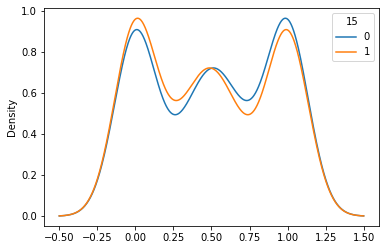

In [145]:
# visualize it
var2_comp.plot(kind='density');

In [146]:
# separate the positive values
pos = var2_comp[1]
pos.head()

2
0.000    0.473684
0.040    0.600000
0.080    1.000000
0.085    0.000000
0.125    0.400000
Name: 1, dtype: float64

In [147]:
# separate the negative values
neg = var2_comp[0]
neg.head()

2
0.000    0.526316
0.040    0.400000
0.080    0.000000
0.085    1.000000
0.125    0.600000
Name: 0, dtype: float64

In [157]:
# run the ttest
# fairly high p vlaue, less extreme difference
ttest_ind(pos, neg)

Ttest_indResult(statistic=-0.6219878302745919, pvalue=0.5342810537692337)

In [152]:
# look at another variable
var13_comp = pd.crosstab(credit[7], credit[15], normalize='index')
var13_comp

15,0,1
7,,
0.000,0.742857,0.257143
0.040,0.606061,0.393939
0.085,0.807692,0.192308
0.125,0.833333,0.166667
0.165,0.909091,0.090909
...,...,...
16.000,0.000000,1.000000
17.500,0.000000,1.000000
18.000,0.000000,1.000000


In [162]:
# look at means
print(credit[15].mean())
credit[7].mean()

0.4449275362318841


2.2234057971014476

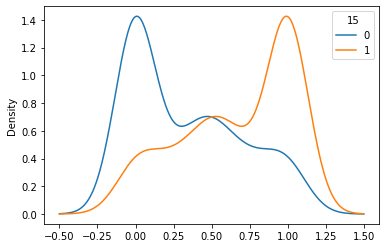

In [163]:
# visualize it
var13_comp.plot(kind='density');

In [164]:
# separate the positive values
posi = var13_comp[1]
posi

7
0.000     0.257143
0.040     0.393939
0.085     0.192308
0.125     0.166667
0.165     0.090909
            ...   
16.000    1.000000
17.500    1.000000
18.000    1.000000
20.000    1.000000
28.500    1.000000
Name: 1, Length: 132, dtype: float64

In [165]:
# separate the negative values
nega = var13_comp[0]
nega

7
0.000     0.742857
0.040     0.606061
0.085     0.807692
0.125     0.833333
0.165     0.909091
            ...   
16.000    0.000000
17.500    0.000000
18.000    0.000000
20.000    0.000000
28.500    0.000000
Name: 0, Length: 132, dtype: float64

In [166]:
# run the ttest
# very low p value means likely to be statistically significant difference
# we can reject null hypothesis
ttest_ind(posi, nega)

Ttest_indResult(statistic=7.771862913897593, pvalue=1.7643123064763363e-13)

In [167]:
# look for categorical variables
credit.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
450,b,NaN,3.000,y,p,i,bb,7.00,f,f,0.0,f,g,0.0,1.0,0
502,a,64.08,0.165,u,g,ff,ff,0.00,t,t,1.0,f,g,232.0,100.0,1
297,b,32.92,2.500,u,g,aa,v,1.75,f,t,2.0,t,g,720.0,0.0,0


In [259]:
# compare variable 5 in crosstab
var5_comp = pd.crosstab(credit[15], credit[5])
var5_comp

5,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
15,,,,,,,,,,,,,,
0,35,75,12,23,11,46,45,7,37,22,27,1,31,6
1,19,62,29,7,14,7,14,3,14,16,51,2,33,32


In [255]:
# create another crosstab with the margins
var5_comp_margins = pd.crosstab(credit[15], credit[5], margins=True)
var5_comp_margins

5,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,All
15,,,,,,,,,,,,,,,
0,35,75,12,23,11,46,45,7,37,22,27,1,31,6,378
1,19,62,29,7,14,7,14,3,14,16,51,2,33,32,303
All,54,137,41,30,25,53,59,10,51,38,78,3,64,38,681


In [256]:
# get row and column totals
row_sums = var5_comp_margins.iloc[0:2, 14:15].values
row_sums

array([[378],
       [303]])

In [257]:
col_sums = var5_comp_margins.iloc[2, 0:14].values
col_sums

array([ 54, 137,  41,  30,  25,  53,  59,  10,  51,  38,  78,   3,  64,
        38])

In [258]:
# get totals
total = var5_comp_margins.loc['All', 'All']
total

681

In [249]:
# find expected values if null hypothesis were true
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
pd.DataFrame(expected)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[29.973568281938327],[76.04405286343612],[22.75770925110132],[16.651982378854626],[13.876651982378855],[29.41850220264317],[32.74889867841409],[5.5506607929515415],[28.308370044052865],[21.09251101321586],[43.29515418502203],[1.6651982378854626],[35.52422907488987],[21.09251101321586]
1,[24.026431718061673],[60.95594713656388],[18.24229074889868],[13.348017621145374],[11.123348017621145],[23.58149779735683],[26.251101321585903],[4.4493392070484585],[22.691629955947135],[16.90748898678414],[34.70484581497797],[1.3348017621145374],[28.475770925110133],[16.90748898678414]


In [261]:
# how does that compare to the values we observe
observed = var5_comp.values
pd.DataFrame(observed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,35,75,12,23,11,46,45,7,37,22,27,1,31,6
1,19,62,29,7,14,7,14,3,14,16,51,2,33,32


In [262]:
# runnig out of time to troubleshoot this, so switching to a different method
chi_squared = ((observed-expected)**2/(expected)).sum()
chi_squared

ValueError: ignored

In [264]:
# run chi square test
stats.chi2_contingency(observed)

(98.32520342679135,
 3.4999300402715717e-15,
 13,
 array([[29.97356828, 76.04405286, 22.75770925, 16.65198238, 13.87665198,
         29.4185022 , 32.74889868,  5.55066079, 28.30837004, 21.09251101,
         43.29515419,  1.66519824, 35.52422907, 21.09251101],
        [24.02643172, 60.95594714, 18.24229075, 13.34801762, 11.12334802,
         23.5814978 , 26.25110132,  4.44933921, 22.69162996, 16.90748899,
         34.70484581,  1.33480176, 28.47577093, 16.90748899]]))

In [265]:
# make it readable
# low p value, we can reject null hypothesis
print('stat', stats.chi2_contingency(observed)[0])
print('pvalue', stats.chi2_contingency(observed)[1])
print('dof', stats.chi2_contingency(observed)[2])
pd.DataFrame(stats.chi2_contingency(observed)[3])

stat 98.32520342679135
pvalue 3.4999300402715717e-15
dof 13


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,29.973568,76.044053,22.757709,16.651982,13.876652,29.418502,32.748899,5.550661,28.30837,21.092511,43.295154,1.665198,35.524229,21.092511
1,24.026432,60.955947,18.242291,13.348018,11.123348,23.581498,26.251101,4.449339,22.69163,16.907489,34.704846,1.334802,28.475771,16.907489


In [266]:
# do it again with another variable
var11_comp = pd.crosstab(credit[15], credit[11])
var11_comp

11,f,t
15,,
0,213,170
1,161,146


In [268]:
# run chi squared test
stats.chi2_contingency(var11_comp)

(0.568273300792113,
 0.45094587758631943,
 1,
 array([[207.59710145, 175.40289855],
        [166.40289855, 140.59710145]]))

In [269]:
# make it readable
# less extreme p value
print('stat', stats.chi2_contingency(var11_comp)[0])
print('pvalue', stats.chi2_contingency(var11_comp)[1])
print('dof', stats.chi2_contingency(var11_comp)[2])
pd.DataFrame(stats.chi2_contingency(var11_comp)[3])

stat 0.568273300792113
pvalue 0.45094587758631943
dof 1


,0,1
0,207.597101,175.402899
1,166.402899,140.597101


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



*   The first ttest I ran produced a p value of approx 0.5 which is large enough to fail to reject the null hypothesis. There isn't enough evidence to say any difference is more than mere chance. The second ttest I ran produced a p value of 1.8 -13 which is extremely small. We can reject the null hypothesis and say that there is likely a statistically significant correlation
*   The first chi2 test I ran produced a p value of 3.5 -15 which is extremely small and indicative of a statically significant correlation. The second chi2 test I ran produced a p value of .45 which is too high to reject the null hypothesis. 


*  The most challenging part for me was working with highly abstracted variables. It's easier to understand what I'm looking for and see how things are related when the variables are labeled and correspond to things I'm already familiar with






## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



Frequentist statistics makes inferences based on a sample of data. Bayesian statistics takes into account prior knowledge that we have of the data. Frequentist method is a bit limited because you can only make inferences based on the data available in the sample. Bayesian method is reliant on the accuracy of prior knowledge

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.